### Objective 
-------------------------------------------
Classify the images as COVID 19 infected.

##### Dataset Data: https://www.kaggle.com/andrewmvd/covid19-ct-scans

#### Possible Work to be done 
-------------------------------------------
1. Write a Data Science Proposal for achieving the objective mentioned. 
2. Perform exploratory analysis on the data. 
3. Perform data wrangling / pre-processing. 
4. Apply any 2 features engineering technique. 
5. Plot top 10 features. 
6. Identification of the performance parameters to be improved, for the given problem statement. 
7. Design Machine Learning models – Logistic regression and Decision tree to predict. 
8. Compare the performance of selected feature engineering techniques. 
9. Compare the performance of the 2 classifiers – Logistic regression and Decision tree to predict. 
10. Present the conclusions/results in the format shared.

Importing all the necessary libraries

In [5]:
import glob
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from pathlib import Path

Setting the working directory Path

In [6]:
working_dir = Path('./')

##### Modified metadata.csv : changed "ct_scan" -> "ct_scans" to match with the folder name (ease of reading)

In [ ]:
# Read and examine metadata
raw_data = pd.read_csv(working_dir.joinpath('metadata.csv'))
raw_data.sample(5)

Read the dataset and storing them in an array

In [8]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [9]:
def rectify_path(filepath, folder):
    temp = Path(filepath).name
    correct_filepath = actual_path.joinpath(folder).joinpath(temp)
    return correct_filepath

Sample dataset is read and stored in arrays

In [11]:
actual_path = Path('./archive/')

# Read sample
sample_ct   = read_nii(rectify_path(raw_data.loc[18,'ct_scans'], 'ct_scans'))
sample_lung = read_nii(rectify_path(raw_data.loc[18,'lung_mask'], 'lung_mask'))
sample_infe = read_nii(rectify_path(raw_data.loc[18,'infection_mask'], 'infection_mask'))
sample_all  = read_nii(rectify_path(raw_data.loc[18,'lung_and_infection_mask'], 'lung_and_infection_mask'))

Getting the shape of the images read

In [12]:
sample_ct.shape, sample_lung.shape, sample_infe.shape, sample_all.shape

((630, 630, 39), (630, 630, 39), (630, 630, 39), (630, 630, 39))

Plotting the sample images to get an idea of the type of data available

In [14]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Lung Mask')

    plt.subplot(1,4,3)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[2], alpha=0.5, cmap=color_map)
    plt.title('Infection Mask')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[3], alpha=0.5, cmap=color_map)
    plt.title('Lung and Infection Mask')

    plt.show()

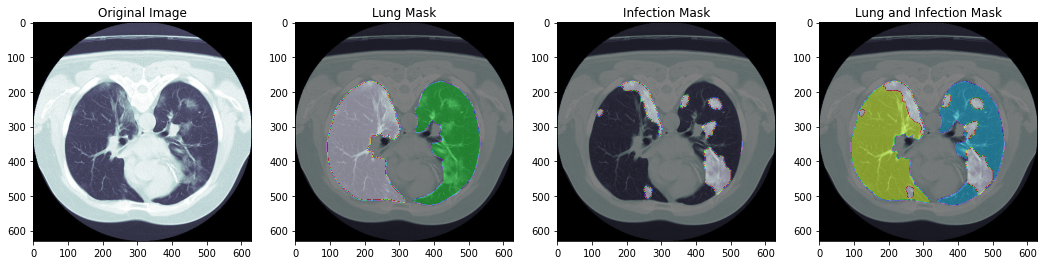

In [15]:
plot_sample([sample_ct[...,20], sample_lung[...,20], sample_infe[...,20], sample_all[...,20]])

Sampling all the datasets so that we can get a picturesque view of the dataset given

In [16]:
def bulk_plot_sample(array_list, index_list):
    '''
    Plots multiple slices, wrapper of plot_sample
    '''
    for index_value in index_list:
        plot_sample([array_list[0][...,index_value], array_list[1][...,index_value], 
                     array_list[2][...,index_value], array_list[3][...,index_value]])

Examine multiple slices of a ct scan and its annotations of 10 samples

In [ ]:
bulk_plot_sample([sample_ct, sample_lung, sample_infe, sample_all], index_list=[10,11,12,13,14,15,18,19,20])

In [ ]:
plt.imshow(sample_ct[:,:,25])

## Original dataset provided for analysis : 
https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from pathlib import Path 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "./COVID-19 Radiography Database/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("./COVID-19 Radiography Database"))

['COVID', 'COVID.metadata.xlsx', 'NORMAL', 'NORMAL.metadata.xlsx', 'README.md.txt', 'VIRAL_Pneumonia', 'VIRAL_Pneumonia.metadata.xlsx']


Here we can see that there are 3 different folders which contains images: COVID, NORMAL and Viral_Pneumonia and the their metadata information in the 3 different excel files

In [5]:
pwd = os.getcwd()   # get current working folder (make sure the data folders are present here)

In [6]:
covid_data = Path(pwd).joinpath('COVID-19 Radiography Database/COVID')
normal_data = Path(pwd).joinpath('COVID-19 Radiography Database/NORMAL')
viral_data = Path(pwd).joinpath('COVID-19 Radiography Database/VIRAL_Pneumonia')

#### Load dataset after defining Image size (features) and labeling them correspondingly for analysis purposes

In [7]:
image_size = 128  # 512
labels = {"covid": 0, "normal": 1, "viral": 2}
decode_labels = {0: "covid", 1 : "normal", 2 : "viral"}

#### Reshaping the images used as part of EDA. Image size coverted to 128 bits as processing increases immensely when used as 256/512/1024

Using TQDM package in python for faster processing of the images as they are sizes are huge in sizes. Labelling the images as COVID/NORMAL/Viral_Pneumonia for the three different datasets. All images are read in the Gray scale format.

In [8]:
covid_raw = []
covid_label = []
covid_files = list(covid_data.glob("*.png"))
for image1 in tqdm(covid_files, desc="COVID Batch: ", unit="imgs", total=len(covid_files)):
    img1 = cv2.imread(str(image1), cv2.IMREAD_GRAYSCALE) 
    covid_raw.append(cv2.resize(img1, (image_size, image_size)))
    covid_label.append(labels["covid"])
    img1 = cv2.resize(img1, (image_size, image_size)).flatten()   
    np_img1 = np.asarray(img1)

normal_raw = []
normal_label = []
mormal_files = list(normal_data.glob("*.png"))
for image2 in tqdm(mormal_files, desc="NORMAL Batch: ", unit="imgs", total=len(mormal_files)): 
    img2 = cv2.imread(str(image2), cv2.IMREAD_GRAYSCALE) 
    normal_raw.append(cv2.resize(img2, (image_size, image_size)))
    normal_label.append(labels["normal"])
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2 = np.asarray(img2)

viral_raw = []
viral_label = []
viral_files = list(viral_data.glob("*.png"))
for image3 in tqdm(viral_files, desc="VIRAL Batch: ", unit="imgs", total=len(viral_files)):
    img3 = cv2.imread(str(image3), cv2.IMREAD_GRAYSCALE) 
    viral_raw.append(cv2.resize(img3, (image_size, image_size)))
    viral_label.append(labels["viral"])
    img3 = cv2.resize(img3, (image_size, image_size)).flatten() 
    np_img3 = np.asarray(img3)


VIRAL Batch: 100%|███████████████████████████████████████████████████████████████| 1345/1345 [00:42<00:00, 31.86imgs/s]


We can clearly see above that COVID has 1200 images, Normal has 1341 images and Viral has 1345 images. All images are processed and stored in the matrix format for image processing.

#### Plotting the image sample to get a view of what the CT scans looks like for each of the three different cases.

Text(0.5, 1.0, ' VIRAL ')

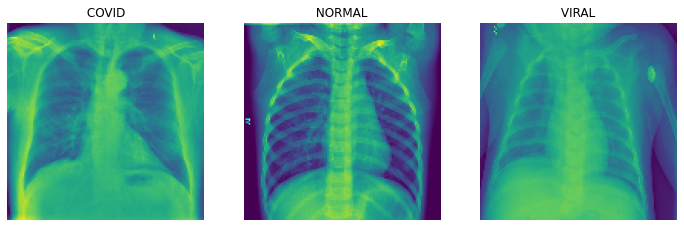

In [9]:
plt.figure(figsize=(12,12))
plt.subplot(1, 3, 1)
plt.imshow(np_img1.reshape(image_size, image_size))
plt.axis('off')
plt.title(" COVID ")
plt.subplot(1, 3, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title(" NORMAL ")
plt.subplot(1, 3, 3)
plt.imshow(np_img3.reshape(image_size, image_size))
plt.axis('off')
plt.title(" VIRAL ")

In [10]:
from skimage import feature
import numpy as np

class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist

In [ ]:
# import the necessary packages
# from pyimagesearch.localbinarypatterns import LocalBinaryPatterns
from sklearn.svm import LinearSVC
from imutils import paths
import argparse
import cv2
import os


args = dict()
args["training"] = str(Path(pwd).joinpath('COVID-19 Radiography Database'))
args["testing"] = str(Path(pwd).joinpath('test'))

# initialize the local binary patterns descriptor along with
# the data and label lists
desc = LocalBinaryPatterns(1024, 128)
data = []
labels = []

# print(args["training"])
print(args["testing"])

In [ ]:
# loop over the training images
for imagePath in tqdm(paths.list_images(args["training"])):
    # load the image, convert it to grayscale, and describe it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    # extract the label from the image path, then update the
    # label and data lists
    labels.append(imagePath.split(os.path.sep)[-2])
    data.append(hist)
# train a Linear SVM on the data
model = LinearSVC(C=100.0, random_state=42, verbose=1)
model.fit(data, labels)

In [ ]:
# loop over the testing images
for imagePath in tqdm(paths.list_images(args["testing"])):
    # load the image, convert it to grayscale, describe it,
    # and classify it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    print(hist)
    plt.hist(hist, bins=5)
    plt.show()
    
#     prediction = model.predict(hist.reshape(1, -1))
#     print(prediction)

    # display the image and the prediction
#     cv2.putText(image, prediction[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
#         1.0, (0, 0, 255), 3)
#     #Show the image with matplotlib
#     plt.imshow(image)
#     plt.figure(figsize=(20, 15))
#     plt.show()

Storing the dataset in a datframe

In [51]:
data_size = pd.DataFrame({'lab':['COVID', 'NORMAL', 'VIRAL'], 'val': [len(covid_raw), len(normal_raw), len(viral_raw)]} )

Plotting to see the Class Imabalance problem

In [ ]:
ax = data_size.plot.bar(color=["red", "green", "blue"], legend=True,x='lab', y='val', rot=0)

Dataset is balanced as in, COVID: 1200; NORMAL: 1341; VIRAL: 1345. No need of Oversampling or Undersampling

#### Training all the dataset for Model preprocessing

In [53]:
train_data = np.concatenate((np.asarray(covid_raw), np.asarray(normal_raw), np.asarray(viral_raw)), axis=0) 

#### Using Min Max Scalar Technique as the Standardization Feature

In [54]:
train_data = (train_data - np.min(train_data)) / (np.max(train_data) - np.min(train_data))
# print(train_data)

In [56]:
test_data = np.concatenate((np.asarray(covid_label), 
                            np.asarray(normal_label), 
                            np.asarray(viral_label)), axis=0).reshape(train_data.shape[0], 1)
# print(test_data)

Showing the features of the images. We can see that there are 3886 images altogether and all images have 128*128 pixel structure

In [57]:
print("X shape: " , train_data.shape)
print("Y shape: " , test_data.shape)

X shape:  (3886, 128, 128)
Y shape:  (3886, 1)


Dividing the data into Training set and Test Set

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, shuffle=True, random_state=0, test_size=0.25)

Reshaping the Training set and Test Set and Extracting the number of features that are present

In [66]:
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print("X train flatten", x_train.shape)
print("X test flatten", x_test.shape)

X train flatten (2914, 16384)
X test flatten (972, 16384)


Training Set contains 2914 images and 16384 features and Test set contains 972 images with 16384 features

In [67]:
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (2914, 16384)
x test:  (972, 16384)
y train:  (2914, 1)
y test:  (972, 1)


#### Preparing to run Logistic Regression for classification of the images to COVID/NORMAL/VIRAL.

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

GridSearchCV lets us combine an estimator with a grid search preamble to tune hyper-parameters. The method picks the optimal parameter from the grid search and uses it with the estimator selected by the user. GridSearchCV inherits the methods from the classifier, so we can use the score, predict, etc., methods directly through the GridSearchCV interface. This technique is used to find the optimal parameters to use with an algorithm. 

In [ ]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('scaler', MinMaxScaler()), ('classifier' , LogisticRegression())])

# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 2, 8),
    'classifier__solver' : ['newton-cg', 'lbfgs'],   # , 'liblinear', 'sag', 'saga'
    'classifier__multi_class' : ['auto']      # , 'ovr', 'multinomial'
    }
]

print(f"# Tuning hyper-parameters ")
best_clf = GridSearchCV(pipe, param_grid = param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

best_clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(best_clf.best_params_)
print(best_clf.best_score_)
print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, best_clf.predict(x_test)
print(classification_report(y_true, y_pred, target_names=["covid","normal","viral"]))
print()
# print(f'Accuracy of logistic Regression classifier on test set: {best_clf.score(X_test, y_test)}')

In [72]:
print(f'Accuracy of Logistic Regression classifier on test set: {accuracy_score(y_true, y_pred)}')

Accuracy of Logistic Regression classifier on test set: 0.9423868312757202


#### Confusion Matrix 

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_clf, x_test, y_test,
                                 display_labels=["covid","normal","viral"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
import joblib
joblib_best_model = 'COVID_best.pkl'
joblib.dump(best_clf.best_estimator_, joblib_best_model, compress = 1)

In [ ]:
# Load from file
joblib_model = joblib.load(joblib_best_model)

# Calculate the accuracy and predictions
score = joblib_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

##### Load data from COVID / NORMAL / VIRAL folders

In [76]:
# test_file = viral_data.joinpath('Viral Pneumonia (16).png')
# test_file = normal_data.joinpath('NORMAL (15).png')
test_file = covid_data.joinpath('COVID (15).png')

In [77]:
image_size = 128

y_img = cv2.imread(str(test_file), cv2.IMREAD_GRAYSCALE)
y_img = cv2.resize(y_img, (image_size, image_size))
y1 = np.asarray(y_img).reshape(y_img.shape[0]*y_img.shape[1], 1)
print(y1.T.shape)

(1, 16384)


### Predict from Logistic Regression model

In [78]:
y_lr = joblib_model.predict(y1.T)

In [79]:
decode_labels[y_lr.tolist()[0]]

'covid'

In [ ]:
y_prob = joblib_model.predict_proba(x_test)


macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

# DECISION TREE Classifier

In [ ]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('scaler', MinMaxScaler()), ('classifier' , DecisionTreeClassifier())])

# Create param grid.
param_grid = [
    {'classifier' : [DecisionTreeClassifier()],
     'classifier__criterion' : ['gini', 'entropy'],
    'classifier__max_features' : ['auto', 'log2'],
    'classifier__class_weight' : ['balanced'],
    'classifier__random_state' : [0],
    },
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(10,100,20)),
#     'classifier__max_features' : list(range(6,30,5)) }
]

print(f"# Tuning hyper-parameters ")
dtree_clf = GridSearchCV(pipe, param_grid = param_grid, cv=10, verbose=1, n_jobs=-1, scoring='accuracy')

dtree_clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(dtree_clf.best_params_)
print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, dtree_clf.predict(x_test)
print(classification_report(y_true, y_pred, target_names=["covid","normal","viral"]))
print()

In [ ]:
print(dtree_clf.best_score_)
print(f'Accuracy of Decision Tree classifier on test set: {accuracy_score(y_true, y_pred)}')

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dtree_clf, x_test, y_test,
                                 display_labels=["covid","normal","viral"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Predict from Decision Tree model

In [84]:
y_dtree = dtree_clf.predict(y1.T)

In [85]:
decode_labels[y_dtree.tolist()[0]]

'normal'

In [ ]:
y_prob = dtree_clf.predict_proba(x_test)


macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [ ]:
imagePath = r'.\COVID-19 Radiography Database\COVID\COVID (1).png'
# print(imagePath)
imagePath.split(os.path.sep)[-2]